国会会議録と同じように、csvを機械学習にかける。
前回は使用比率によって色々変えたけど、とりあえず一つのパターンでやってみる。
可能であれば関数化もする。

In [1]:
import sys;sys.path.append('./src')
import sqlite3
import re
from DB import *
from NLP import *
from ML import *

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import re 
from collections import Counter
import urllib.request as urllib
from bs4 import BeautifulSoup
import sqlite3
import time
from contextlib import closing
import sklearn
import seaborn as sns
# import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
def confmat(y_values,y_pred,target_name,threshold=0.25):
    if f1_score(y_values,y_pred,average='micro')>threshold:
        print (classification_report(y_values,y_pred,target_names=target_name)) 
        confmat=confusion_matrix(y_true=y_values,y_pred=y_pred)
        fig,ax=plt.subplots(figsize=(2.5,2.5))
        ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
        for i in range(confmat.shape[0]):
            for j in range(confmat.shape[1]):
                ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
        plt.xlabel('predicted label')       
        plt.ylabel('true label')     
        plt.tight_layout()
        plt.show()

In [3]:
LABEL_NAME=['高評価','低評価']
CLASIFFIER={'RandomForest':RandomForestClassifier(random_state=1),
                    'NB':MultinomialNB()}
USE_PERCENTS=[0.001,0.0004,0.0001,0.00001]
PATH_HEAD='../data/csv/'


# ldf=pd.read_csv(f'{PATH_HEAD}1121low_mor.csv')
# hdf=pd.read_csv(f'{PATH_HEAD}1121high_mor.csv')

ldf=pd.read_csv(f'{PATH_HEAD}1121low_mor_goiword.csv')
hdf=pd.read_csv(f'{PATH_HEAD}1121high_mor_goiword.csv')

DF_LIST={'高評価':hdf,
                '低評価':ldf}



In [4]:
mdf=pd.DataFrame()
mdf=pd.merge(hdf,ldf,on='Unnamed: 0',how='outer')
mdf['sum']=mdf['sum_x']+mdf['sum_y']
mdf.drop(columns=['sum_x','sum_y'],inplace=True)
label=[0]*(hdf.shape[1]-2)+[1]*(ldf.shape[1]-2)



In [5]:
df,word_df=preproDF(mdf,0.04)
X=df.values
Y=label

# CLF=RandomForestClassifier(random_state=1)
CLF=MultinomialNB()
CLF.fit(X,Y)
y_pred=cross_val_predict(CLF,X,Y,cv=50)

In [6]:
print(f1_score(Y,y_pred,average='micro'))

0.5194132873166523


              precision    recall  f1-score   support

         高評価       0.52      0.52      0.52      1161
         低評価       0.52      0.52      0.52      1157

   micro avg       0.52      0.52      0.52      2318
   macro avg       0.52      0.52      0.52      2318
weighted avg       0.52      0.52      0.52      2318



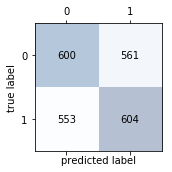

In [7]:
confmat(Y,y_pred,LABEL_NAME)

0.001でRandomForestを使用。
要素数は(2318, 107)
              precision    recall  f1-score   support

         高評価       0.50      0.63      0.56      1161
         低評価       0.51      0.38      0.44      1157

   micro avg       0.51      0.51      0.51      2318
   macro avg       0.51      0.50      0.50      2318
weighted avg       0.51      0.51      0.50      2318



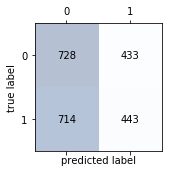


0.001でNBを使用。
要素数は(2318, 107)
              precision    recall  f1-score   support

         高評価       0.50      0.49      0.50      1161
         低評価       0.50      0.50      0.50      1157

   micro avg       0.50      0.50      0.50      2318
   macro avg       0.50      0.50      0.50      2318
weighted avg       0.50      0.50      0.50      2318



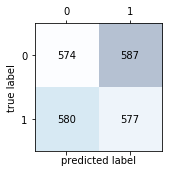


0.0004でRandomForestを使用。
要素数は(2318, 382)
              precision    recall  f1-score   support

         高評価       0.52      0.66      0.58      1161
         低評価       0.54      0.40      0.46      1157

   micro avg       0.53      0.53      0.53      2318
   macro avg       0.53      0.53      0.52      2318
weighted avg       0.53      0.53      0.52      2318



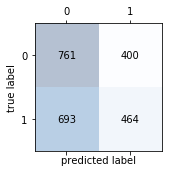


0.0004でNBを使用。
要素数は(2318, 382)
              precision    recall  f1-score   support

         高評価       0.56      0.52      0.54      1161
         低評価       0.55      0.59      0.57      1157

   micro avg       0.56      0.56      0.56      2318
   macro avg       0.56      0.56      0.56      2318
weighted avg       0.56      0.56      0.56      2318



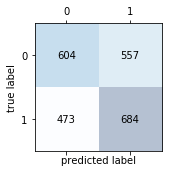


0.0001でRandomForestを使用。
要素数は(2318, 1609)
              precision    recall  f1-score   support

         高評価       0.53      0.64      0.58      1161
         低評価       0.54      0.42      0.47      1157

   micro avg       0.53      0.53      0.53      2318
   macro avg       0.53      0.53      0.53      2318
weighted avg       0.53      0.53      0.53      2318



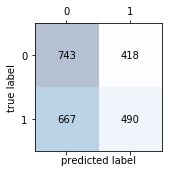


0.0001でNBを使用。
要素数は(2318, 1609)
              precision    recall  f1-score   support

         高評価       0.56      0.53      0.54      1161
         低評価       0.55      0.58      0.57      1157

   micro avg       0.56      0.56      0.56      2318
   macro avg       0.56      0.56      0.56      2318
weighted avg       0.56      0.56      0.56      2318



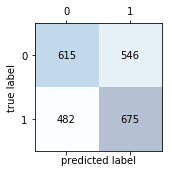


1e-05でRandomForestを使用。
要素数は(2318, 7212)
              precision    recall  f1-score   support

         高評価       0.53      0.64      0.58      1161
         低評価       0.54      0.43      0.48      1157

   micro avg       0.53      0.53      0.53      2318
   macro avg       0.54      0.53      0.53      2318
weighted avg       0.54      0.53      0.53      2318



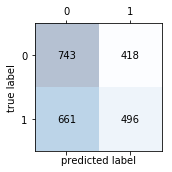


1e-05でNBを使用。
要素数は(2318, 7212)
              precision    recall  f1-score   support

         高評価       0.56      0.53      0.55      1161
         低評価       0.56      0.59      0.57      1157

   micro avg       0.56      0.56      0.56      2318
   macro avg       0.56      0.56      0.56      2318
weighted avg       0.56      0.56      0.56      2318



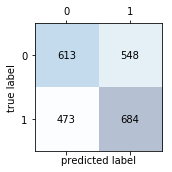

In [9]:
for PERCENT in USE_PERCENTS:
    df,word_df=preproDF(mdf,PERCENT)
    for CLFN,CLF in CLASIFFIER.items():
        X=df.values
        Y=label
        CLF.fit(X,Y)
        y_pred=cross_val_predict(CLF,X,Y,cv=50)
        if f1_score(Y,y_pred,average='micro')>0.3:
            print(f'{PERCENT}で{CLFN}を使用。')
            print(f'要素数は{df.shape}')
            confmat(Y,y_pred,LABEL_NAME)
            print()